In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/content/customer_churn (1) (1).csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


####Data Manipulation

In [5]:
# Extract the 5th column & store it in ‘customer_5’
customer_5 = df.iloc[ : ,4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [6]:
#Extract the 15th column & store it in ‘customer_15’
customer_15 = df.iloc[ : ,14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [7]:
'''
Extract all the male senior citizens whose Payment Method is Electronic check & store the
result in ‘senior_male_electronic’
'''
senior_male_electronic = df[(df['gender']=='Male') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Electronic check')]
print(senior_male_electronic.to_string())

      customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService       OnlineSecurity         OnlineBackup     DeviceProtection          TechSupport          StreamingTV      StreamingMovies        Contract PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges Churn
20    8779-QRDMV   Male              1      No         No       1           No  No phone service             DSL                   No                   No                  Yes                   No                   No                  Yes  Month-to-month              Yes  Electronic check           39.65        39.65   Yes
55    1658-BYGOY   Male              1      No         No      18          Yes               Yes     Fiber optic                   No                   No                   No                   No                  Yes                  Yes  Month-to-month              Yes  Electronic check           95.45      1752.55   Yes
57    5067-XJQFU   Male  

In [8]:
'''
Extract all those customers whose tenure is greater than 70 months or their Monthly
charges is more than 100$ & store the result in ‘customer_total_tenure’
'''
customer_total_tenure = df[(df["tenure"]>70) | (df["MonthlyCharges"]>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [9]:
'''
Extract all the customers whose Contract is of two years, payment method is Mailed check
& the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes
'''
two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] =='Mailed check') & (df['Churn'] == 'Yes')]
print(two_mail_yes.to_string())

      customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService MultipleLines InternetService       OnlineSecurity         OnlineBackup     DeviceProtection          TechSupport          StreamingTV      StreamingMovies  Contract PaperlessBilling PaymentMethod  MonthlyCharges TotalCharges Churn
268   6323-AYBRX    Male              0      No         No      59          Yes            No              No  No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Two year               No  Mailed check           19.35       1099.6   Yes
5947  7951-QKZPL  Female              0     Yes        Yes      33          Yes           Yes              No  No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Two year              Yes  Mailed check           24.50        740.3   Yes
6680  9412-ARGBX  Female              0      No        Yes      

In [10]:
'''
Extract 333 random records from the customer_churn dataframe & store the result in
'customer_333'
'''
customer_333 = df.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
308,3167-SNQPL,Male,1,Yes,Yes,38,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.15,3741.85,No
142,1095-WGNGG,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),101.05,5971.25,No
4056,3329-WDIOK,Female,0,No,No,3,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.60,155.35,Yes
204,9142-KZXOP,Male,0,No,No,44,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),68.85,2958.95,No
6785,3090-HAWSU,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),111.60,6876.05,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,1453-RZFON,Female,0,No,Yes,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,49.90,49.9,No
6035,9835-ZIITK,Male,1,Yes,No,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,110.85,7491.75,Yes
3974,9592-ERDKV,Male,0,Yes,No,37,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Mailed check,79.25,2911.8,No
6742,1960-UOTYM,Male,0,Yes,Yes,52,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Electronic check,79.20,4016.3,No


In [11]:
#Get the count of different levels from the ‘Churn’ column
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

####Data Visualization

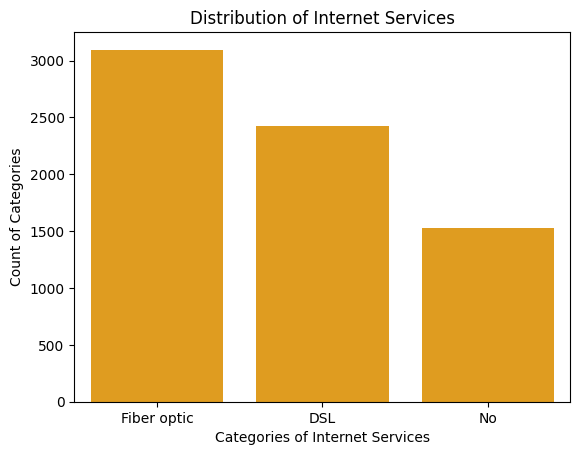

In [16]:
'''
a. Build a bar-plot for the ’InternetService’ column:
i. Set x-axis label to ‘Categories of Internet Service’
ii. Set y-axis label to ‘Count of Categories’
iii. Set the title of plot to be ‘Distribution of Internet Service’
iv. Set the color of the bars to be ‘orange’
'''
internet_service_dict = dict(df.InternetService.value_counts())
sns.barplot(x=internet_service_dict.keys(),y=internet_service_dict.values(),color='orange')
plt.xlabel('Categories of Internet Services')
plt.ylabel('Count of Categories')
plt.title ('Distribution of Internet Services')
plt.show()

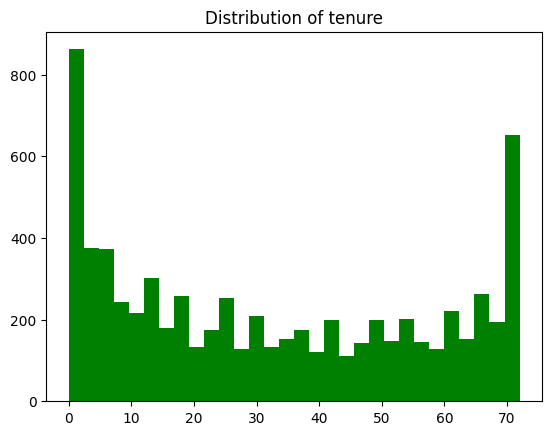

In [17]:
'''
b. Build a histogram for the ‘tenure’ column:
i. Set the number of bins to be 30
ii. Set the color of the bins to be ‘green’
iii. Assign the title ‘Distribution of tenure
'''
plt.hist(x=df.tenure,bins=30,color='green')
plt.title('Distribution of tenure')
plt.show()

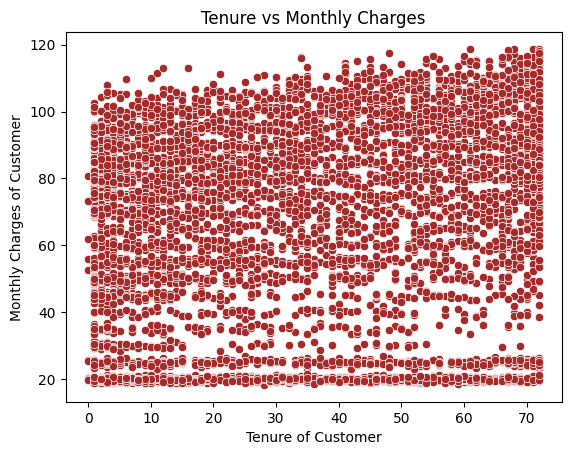

In [21]:
'''
c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:
i. Assign the points a color of ‘brown’
ii. Set the x-axis label to ‘Tenure of customer’
iii. Set the y-axis label to ‘Monthly Charges of customer’
iv. Set the title to ‘Tenure vs Monthly Charges’
'''
sns.scatterplot(x=df.tenure,y=df.MonthlyCharges,color='brown')
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

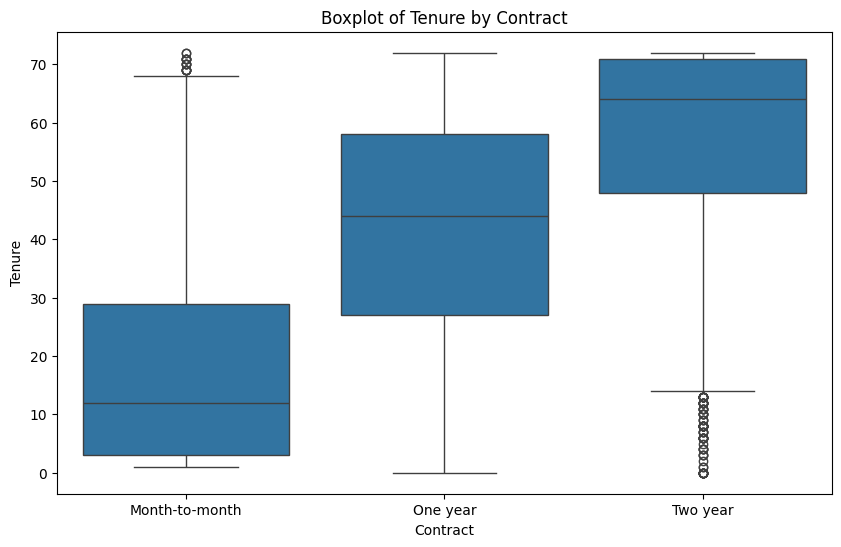

In [22]:
'''
d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on
the x-axis.
'''
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,y="tenure",x="Contract",)
plt.title("Boxplot of Tenure by Contract")
plt.xlabel("Contract")
plt.ylabel("Tenure")
plt.show()

####Linear Regression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
X = df['tenure'].values.reshape(-1, 1)
y = df['MonthlyCharges'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=33)

In [40]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared error: ",rmse)

Root Mean Squared error:  29.147547380331314


In [47]:
error = y_test - y_pred
rmse_error = np.sqrt(np.mean(error**2))
print(rmse_error)

29.147547380331314


####Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
X = df['MonthlyCharges'].values.reshape(-1,1)
y = df['Churn'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=33)
lo_a = LogisticRegression()
lo_a.fit(X_train,y_train)

LogisticRegression()

In [57]:
y_pred=lo_a.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1803    0]
 [ 663    0]]


In [59]:
print(accuracy_score(y_test,y_pred))

0.7311435523114356


In [66]:
X1 = df.loc[ : ,['tenure','MonthlyCharges']]
y1 = df['Churn'].values
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.20,random_state=33)
lo_b = LogisticRegression()
lo_b.fit(X_train1,y_train1)

LogisticRegression()

In [67]:
y_pred1=lo_b.predict(X_test1)

In [70]:
cm_b = confusion_matrix(y_test1,y_pred1)
print(cm_b)

[[941  85]
 [214 169]]


In [71]:
print(accuracy_score(y_test1,y_pred1))

0.7877927608232789


####Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
X_dt = df['tenure'].values.reshape(-1, 1)
y_dt = df['Churn'].values
X_train,X_test,y_train,y_test = train_test_split(X_dt,y_dt,test_size = 0.20,random_state=33)
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
y_pred = dt.predict(X_test)

In [75]:
cm_dt = confusion_matrix(y_test,y_pred)
print(cm_dt)

[[958  68]
 [282 101]]


In [76]:
print(accuracy_score(y_test,y_pred))

0.751596877217885


####Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
X_rf = df.loc[ : ,['tenure','MonthlyCharges']]
y_rf = df['Churn'].values
X_train,X_test,y_train,y_test = train_test_split(X_rf,y_rf,test_size = 0.30,random_state=33)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
y_pred = rf.predict(X_test)

In [79]:
cm_rf = confusion_matrix(y_test,y_pred)
print(cm_rf)

[[1327  220]
 [ 303  263]]


In [80]:
print(accuracy_score(y_test,y_pred))

0.7524846190250828
